# Tarea 1 Importar librerias

In [12]:
pip install --upgrade --user numpy


Note: you may need to restart the kernel to use updated packages.


In [11]:
conda install -c conda-forge hdbscan

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\PROGRAMAS\Anaconda

  added / updated specs:
    - hdbscan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    hdbscan-0.8.27             |   py38h347fdf6_0         529 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  hdbscan            conda-forge/win-64::hdbscan-0.8.27-py38h347fdf6_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.3-py38haa244fe_0




python_abi



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [13]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score #para evaluar el clustering
from sklearn.datasets import make_blobs 
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict

import hdbscan
import folium
import re

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*10 #definición de colores

# Tarea 2 Analisis exploratorio de datos


In [56]:
df = pd.read_csv('taxi_data.csv')


In [57]:
df.duplicated(subset=['LON','LAT']).values.any() #Elimiacion de duplicados

True

In [58]:
df.isna().values.any() # Veerificar valores NaN

True

In [59]:
print(f'Antes de eliminar valores NaN y duplicados\t:\tdf.shape = {df.shape}')
df.dropna(inplace=True)
df.drop_duplicates(subset=['LON', 'LAT'], keep='first', inplace=True)
print(f'Luego de eliminar valores NaN y duplicados\t:\tdf.shape = {df.shape}')

Antes de eliminar valores NaN y duplicados	:	df.shape = (838, 3)
Luego de eliminar valores NaN y duplicados	:	df.shape = (823, 3)


In [60]:
df.head()

LON       LAT                          NAME
0  28.17858 -25.73882         11th Street Taxi Rank
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank
2  27.83239 -26.53722          Adams Road Taxi Rank
3  28.12514 -26.26666  Alberton City Mall Taxi Rank
4  28.10144 -26.10567      Alexandra Main Taxi Rank

In [61]:
x = np.array(df[['LON','LAT']], dtype='float64') # Dats en Numpy Array
x

array([[ 28.17858, -25.73882],
       [ 28.1766 , -25.73795],
       [ 27.83239, -26.53722],
       ...,
       [ 27.83991, -26.24235],
       [ 27.86166, -26.23624],
       [ 28.39097, -26.30931]])

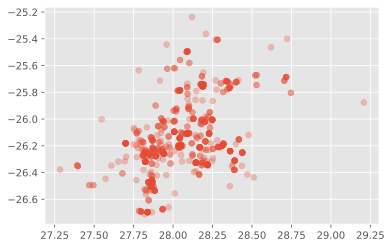

In [62]:
plt.scatter(x[:,0],x[:,1], alpha=0.3) #Densidad de puntos (Clustering)

## Tarea 3: Visualizacion de los datos geograficos 

In [63]:
m = folium.Map(location=[df.LAT.mean(),df.LON.mean()], zoom_start=9, 
               titles='Stame Toner')
m

In [64]:
# Agregar datos al mapa 
for _, row in df.iterrows():
    folium.CircleMarker(
        location = [row.LAT, row.LON],
        radius = 5,
        popup = re.sub(r'[^a-zA-Z]+', '', row.NAME),
        color = '#1787FE',
        fill = True,
        fill_colour = '#1787FE'
    
    ).add_to(m)

m

### TAREA 4: Clustering y Metricas de rendimiento (silueta [-1 a 1])

In [65]:
# EL VALOR DE LA SILUETA DE [-1 A1] , MEJOR VALOR 1

# Generaccion de datos randomicos los cuales forman clusters
x_blobs,_ = make_blobs(n_samples=1000, centers=10, n_features = 2, 
                       cluster_std=0.5, random_state=4)


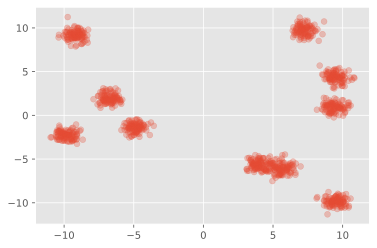

In [66]:
plt.scatter(x_blobs[:,0],x_blobs[:,1], alpha=0.3)

In [67]:
class_predictions=np.load('sample_clusters.npy')
class_predictions

array([2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1,
       1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0,

In [68]:
unique_clusters = np.unique(class_predictions)
unique_clusters

array([0, 1, 2])

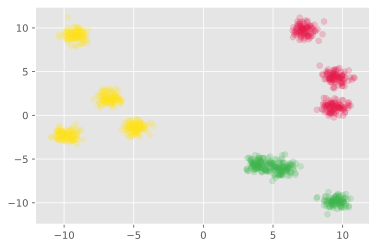

In [69]:
# Mapping de los datos anteriores (100) a los clusters 0,1,2
for unique_cluster in unique_clusters:
    X = x_blobs[class_predictions==unique_cluster]
    plt.scatter(X[:,0], X[:,1], alpha=0.2, c = cols[unique_cluster])

In [70]:
silhouette_score(x_blobs, class_predictions)

0.6657220862867241

In [71]:
# Ejemplo de clustering manualmente mejorado


In [72]:
class_predictions_improved=np.load('sample_clusters_improved.npy')
class_predictions_improved

array([1, 6, 7, 7, 4, 3, 2, 3, 5, 4, 6, 2, 5, 0, 1, 9, 2, 2, 9, 9, 6, 0,
       7, 8, 1, 9, 5, 3, 8, 2, 1, 2, 0, 7, 8, 5, 7, 2, 9, 8, 8, 5, 7, 5,
       6, 2, 7, 9, 3, 6, 4, 7, 4, 2, 9, 6, 5, 1, 6, 7, 0, 0, 6, 7, 4, 3,
       7, 6, 8, 4, 5, 5, 3, 7, 6, 1, 3, 8, 9, 5, 9, 7, 8, 1, 1, 4, 5, 7,
       4, 7, 7, 8, 1, 2, 5, 7, 2, 3, 6, 6, 7, 8, 4, 8, 2, 6, 8, 8, 7, 1,
       0, 5, 0, 2, 7, 2, 2, 9, 2, 6, 2, 4, 3, 5, 8, 2, 2, 6, 4, 7, 8, 8,
       7, 0, 4, 4, 3, 6, 3, 3, 8, 8, 1, 9, 0, 6, 6, 7, 7, 3, 3, 1, 0, 5,
       2, 3, 0, 8, 0, 0, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 6, 1, 3, 7, 8, 1,
       6, 8, 4, 1, 4, 2, 6, 3, 2, 4, 5, 2, 6, 0, 6, 9, 3, 6, 1, 5, 3, 5,
       4, 5, 7, 6, 4, 5, 5, 4, 5, 5, 7, 0, 2, 1, 7, 9, 2, 6, 6, 0, 1, 0,
       1, 4, 0, 7, 8, 7, 4, 0, 8, 0, 6, 7, 7, 2, 5, 4, 8, 0, 4, 3, 1, 4,
       4, 7, 8, 5, 3, 6, 1, 4, 8, 0, 0, 4, 9, 1, 4, 2, 8, 0, 9, 3, 6, 5,
       4, 0, 6, 2, 3, 0, 1, 2, 5, 9, 8, 0, 7, 1, 7, 0, 9, 0, 4, 0, 7, 9,
       3, 4, 9, 8, 2, 0, 9, 5, 5, 6, 3, 3, 2, 1, 3,

In [73]:
unique_clusters_improved = np.unique(class_predictions_improved)
unique_clusters_improved

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

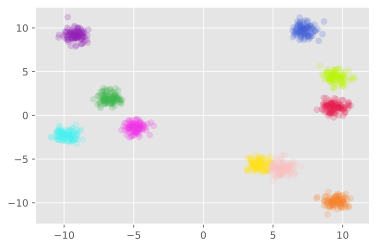

In [74]:
# Mapping de los datos anteriores (100) a los clusters 0,1,2
for unique_clusters_improved in unique_clusters_improved:
    X = x_blobs[class_predictions_improved==unique_clusters_improved]
    plt.scatter(X[:,0], X[:,1], alpha=0.2, c = cols[unique_clusters_improved])

In [75]:
silhouette_score(x_blobs, class_predictions_improved)

0.7473587799908298

### Tarea 5 : Realizar el clustering utilizando Kmeas-clustering

In [76]:
x_blobs,_ = make_blobs(n_samples=1000, centers=50,
                      n_features=2, cluster_std=1, random_state=4)

In [77]:
data = defaultdict(dict)
for x in range(1,21):
    model = KMeans(n_clusters=9, random_state=17, 
                   max_iter=x, n_init=1).fit(x_blobs)
    
    data[x]['class_predictions'] = model.predict(x_blobs)
    data[x]['centroids'] = model.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions_improved)




In [78]:
def f(x):
    class_predictions_improved = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']

 

    for unique_class in unique_classes:
            plt.scatter(x_blobs[class_predictions_improved==unique_class][:,0], 
                        x_blobs[class_predictions_improved==unique_class][:,1], 
                        alpha=0.3, c=cols[unique_class])
    plt.scatter(centroids[:,0], centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15]); plt.xlim([-15,15])
    plt.title('Iteración en los clusters K-Means')

 

interactive_plot = interactive(f, x=(1, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output(layout=Layout(height='350px'…

In [90]:
silhouette_score( data[x]['class_predictions'], data[x]['unique_classes'])

ValueError: Expected 2D array, got 1D array instead:
array=[0 4 6 4 4 5 4 5 6 6 4 8 5 7 8 6 6 0 2 5 7 5 0 5 5 5 6 0 6 2 6 1 4 6 4 5 7
 3 0 2 1 5 0 4 8 1 0 4 3 6 4 6 4 5 8 6 3 4 5 2 0 5 5 2 2 6 0 4 8 5 5 8 4 5
 6 5 6 6 8 8 0 4 5 8 7 6 4 4 5 5 5 0 3 6 8 5 5 4 6 8 6 0 3 2 3 5 6 5 5 1 2
 8 3 7 5 4 6 5 7 5 7 2 6 5 4 4 2 5 2 1 5 0 7 4 7 0 1 8 5 1 5 6 8 4 5 5 6 6
 5 2 6 0 2 0 1 2 7 0 6 5 4 6 5 5 4 1 6 3 6 0 1 0 2 2 2 0 1 5 1 3 8 7 5 6 6
 4 5 2 4 8 6 8 0 5 3 5 5 8 3 4 0 4 5 3 5 5 5 4 2 0 0 5 1 4 8 2 0 7 4 3 4 7
 3 5 5 0 2 0 8 2 7 1 1 8 0 2 8 1 1 6 5 0 4 6 5 0 3 4 0 3 0 3 6 2 6 3 7 4 2
 2 5 5 4 5 1 7 0 1 8 2 5 0 8 6 6 7 8 4 5 8 5 6 5 6 3 5 4 8 6 8 5 5 5 5 5 5
 5 4 4 6 8 1 4 5 1 5 0 8 8 3 5 5 4 8 4 5 0 5 5 6 6 4 3 8 5 7 6 6 2 8 5 3 0
 2 3 5 4 0 8 0 6 8 1 4 6 6 5 7 0 3 1 6 0 6 4 8 6 4 6 5 1 3 3 3 8 6 5 7 4 2
 4 3 0 1 6 5 6 1 1 4 4 6 2 0 8 2 0 4 5 8 7 3 8 3 5 2 3 5 7 1 4 4 4 1 2 6 6
 0 6 8 3 5 5 6 6 2 7 5 6 4 2 8 7 0 7 6 5 4 6 7 5 5 8 7 6 8 4 7 2 5 2 7 4 0
 4 0 4 4 1 1 6 8 4 5 7 4 4 1 1 4 4 5 2 1 5 1 4 0 5 6 3 5 8 6 5 6 3 1 2 2 5
 0 1 8 8 8 3 7 1 6 7 5 3 0 2 2 0 0 2 8 6 5 2 4 5 2 5 5 4 8 0 8 7 2 5 6 5 2
 3 8 7 3 8 1 5 5 5 5 0 5 5 0 7 5 5 2 2 7 5 5 5 3 5 7 4 1 8 5 8 2 6 4 0 7 6
 0 5 8 5 6 2 5 3 5 4 2 5 8 5 6 6 4 3 8 0 6 2 5 4 4 6 5 6 8 2 8 4 6 0 5 8 5
 5 5 5 4 6 4 1 0 6 5 2 4 6 1 6 8 7 0 0 2 7 5 8 1 8 2 3 5 0 8 7 0 1 5 8 8 8
 2 1 7 4 5 6 3 5 0 5 0 3 5 3 2 1 1 4 3 6 5 4 6 5 5 2 4 3 4 8 8 1 4 5 4 0 8
 6 6 3 5 7 5 8 0 8 8 6 6 5 4 7 8 7 2 0 5 2 2 5 0 1 0 6 4 4 6 0 4 8 4 0 7 4
 6 2 8 8 8 5 0 6 1 8 4 6 3 5 3 1 4 4 0 2 6 1 5 0 8 2 0 2 5 6 0 6 5 2 4 5 5
 5 3 3 2 5 1 5 3 3 6 3 1 4 5 2 7 5 5 2 5 0 0 0 5 5 1 8 7 6 6 7 1 8 2 8 0 5
 4 3 6 6 4 5 5 4 5 0 5 5 6 4 4 0 8 1 2 0 2 7 0 5 4 7 5 6 4 5 4 3 3 5 8 5 0
 4 1 5 4 2 7 5 5 5 7 6 3 0 8 5 1 4 4 0 0 3 5 8 7 3 5 0 1 4 5 8 5 6 6 0 0 5
 0 0 3 1 5 6 1 0 4 6 3 1 7 5 0 5 0 0 5 3 2 8 6 3 0 6 7 5 0 0 4 5 2 5 5 5 6
 8 2 0 2 5 2 5 8 5 4 3 3 8 6 0 4 5 5 5 3 1 3 4 4 5 4 2 5 1 7 5 0 1 5 6 4 0
 4 4 1 7 7 8 0 1 1 5 0 3 5 1 5 8 5 3 6 5 8 1 8 5 5 0 4 3 6 5 1 7 5 0 7 1 6
 2 4 7 2 2 4 5 8 5 2 8 1 5 0 4 6 8 4 6 0 4 4 0 8 3 3 6 3 2 2 8 1 7 5 7 5 5
 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [80]:
len(X)

100

**REGRESO AL EJERCICIO DE LOS TAXIS**

In [83]:
X =np.array(df[['LON', 'LAT']], dtype='float64')
k = 70
model = KMeans(n_clusters=k, random_state=17).fit(X)
class_predictions = model.predict(X)
df[f'CLUSTER_kmeans{k}'] = class_predictions

In [84]:
df.head()

LON       LAT                          NAME  CLUSTER_kmeans70
0  28.17858 -25.73882         11th Street Taxi Rank                 1
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank                 1
2  27.83239 -26.53722          Adams Road Taxi Rank                 9
3  28.12514 -26.26666  Alberton City Mall Taxi Rank                 8
4  28.10144 -26.10567      Alexandra Main Taxi Rank                 4

In [86]:
def create_map(df, cluster_column):
    m = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start=9, tiles='Stamen Toner')

 

    for _, row in df.iterrows():

 

        # get a colour
        cluster_colour = cols[row[cluster_column]]

 

        folium.CircleMarker(
            location= [row['LAT'], row['LON']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
    
    return m

 

m = create_map(df, 'CLUSTER_kmeans70')
print(f'K={k}')
print(f'Silhouette Score: {silhouette_score(X, class_predictions)}')

 

m.save('kmeans_70.html')

K=70
Silhouette Score: 0.2992028899216722


### Tarea 6: DBSCAN

In [87]:
model = DBSCAN(eps=0.01, min_samples=5).fit(X)
class_predictions = model.labels_
df['CLUSTERS_DBSCAN'] = class_predictions
m = create_map(df, 'CLUSTERS_DBSCAN')

In [88]:
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')

no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')





Number of clusters found: 51
Number of outliers found: 289
Silhouette ignoring outliers: 0.923213824804447
Silhouette outliers as singletons: 0.5667489347252957


In [91]:
m

In [89]:
best_silhouette, best_k = -1, 0

 

for k in tqdm(range(2, 100)):
    model = KMeans(n_clusters=k, random_state=1).fit(X)
    class_predictions = model.predict(X)
    
    curr_silhouette = silhouette_score(X, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette
        
print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}') 

100%|██████████| 98/98 [01:06<00:00,  1.47it/s]

K=99
Silhouette Score: 0.708499624089545


### Tarea 7: HDBSCAN

In [92]:
hdbscan.HDBSCAN?

In [93]:
mode = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, 
                       cluster_selection_epsilon=0.01)
class_predictions = model.fit_predict(X)
df['CLUSTER_HDBSCAN'] = class_predictions

In [94]:
m = create_map(df, 'CLUSTERS_DBSCAN')
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')
print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')
no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')

Number of clusters found: 99
Number of outliers found: 0
Silhouette ignoring outliers: 0.708499624089545
Silhouette outliers as singletons: 0.708499624089545


In [95]:
m